In [26]:
import pandas as pd
import pandas_datareader.data as web
from datetime import datetime

In [27]:
# 取得公司資料
def get_companies(ex = "NASDAQ"):
    template = "http://www.nasdaq.com/screening/companies-by-industry.aspx?exchange={}&render=download"
    url = template.format(ex)
    return pd.read_csv(url)

In [28]:
df = get_companies()

In [29]:
df.head()

,Symbol,Name,LastSale,MarketCap,ADR TSO,IPOyear,Sector,Industry,Summary Quote,Unnamed: 9
0,PIH,"1347 Property Insurance Holdings, Inc.",7.45,4.458651e+07,n/a,2014,Finance,Property-Casualty Insurers,http://www.nasdaq.com/symbol/pih,NaN
1,TURN,180 Degree Capital Corp.,2,6.224312e+07,n/a,n/a,Finance,Finance/Investors Services,http://www.nasdaq.com/symbol/turn,NaN
2,FLWS,"1-800 FLOWERS.COM, Inc.",10.6,6.850193e+08,n/a,1999,Consumer Services,Other Specialty Stores,http://www.nasdaq.com/symbol/flws,NaN
3,FCCY,1st Constitution Bancorp (NJ),18.35,1.481424e+08,n/a,n/a,Finance,Savings Institutions,http://www.nasdaq.com/symbol/fccy,NaN
4,SRCE,1st Source Corporation,50.95,1.321446e+09,n/a,n/a,Finance,Major Banks,http://www.nasdaq.com/symbol/srce,NaN


In [30]:
computer_selected = df[(df['MarketCap'] > 3e8) & (df['MarketCap'] < 3.2e8)]['Symbol'].tolist()

In [31]:
len(computer_selected)

36

In [32]:
self_selected = ['GOOG', 'YHOO', 'AAPL', 'TSLA', 'MSFT']

In [33]:
candidates = computer_selected + self_selected

In [34]:
candidates = set(candidates)

In [35]:
candidates = list(candidates)

In [36]:
data = {}

for symbol in candidates:
    try:
        data[symbol] = web.DataReader(symbol, 'yahoo', datetime(2016, 1, 1))
    except Exception as e:
        print("Error accesing symbol:", symbol, "==>", e.args)

Error accesing symbol: RMTI ==> ('Unable to read URL: https://query1.finance.yahoo.com/v7/finance/download/RMTI?period1=1451577600&period2=1512575999&interval=1d&events=history&crumb=IiCt4pB%5Cu002FBZA',)
Error accesing symbol: YHOO ==> ('Unable to read URL: https://query1.finance.yahoo.com/v7/finance/download/YHOO?period1=1451577600&period2=1512575999&interval=1d&events=history&crumb=IRxWfJcw2vI',)
Error accesing symbol: MSFT ==> ('Unable to read URL: https://query1.finance.yahoo.com/v7/finance/download/MSFT?period1=1451577600&period2=1512575999&interval=1d&events=history&crumb=7Kx6e%5Cu002FVRRjd',)
Error accesing symbol: AVEO ==> ('Unable to read URL: https://query1.finance.yahoo.com/v7/finance/download/AVEO?period1=1451577600&period2=1512575999&interval=1d&events=history&crumb=T%5Cu002FLNjD.R.JR',)
Error accesing symbol: CCXI ==> ('Unable to read URL: https://query1.finance.yahoo.com/v7/finance/download/CCXI?period1=1451577600&period2=1512575999&interval=1d&events=history&crumb=vf.c

In [37]:
# 看看有幾筆資料
len(data.keys())

35

## 將股票序列化並存成檔案

In [38]:
import pickle

with open('stockdata', 'wb') as f:
    pickle.dump(data, file=f)

## 將股票資料讀回來使用看看

In [39]:
with open('stockdata', 'rb') as f:
    stocks = pickle.load(file=f)

In [40]:
stocks.keys()

dict_keys(['TICC', 'TWIN', 'AMOT', 'CDZI', 'GOOG', 'TBNK', 'POPE', 'RICK', 'UTMD', 'ABLX', 'YTRA', 'CSML', 'NLNK', 'BLCM', 'CZNC', 'GERN', 'PBNC', 'CDXS', 'TTPH', 'SCAC', 'HBCP', 'LCA', 'BBGI', 'TCRD', 'TSLA', 'ISRL', 'BELFB', 'PSC', 'NKSH', 'ROSE', 'VRA', 'NEWT', 'AAPL', 'FFKT', 'DFRG'])

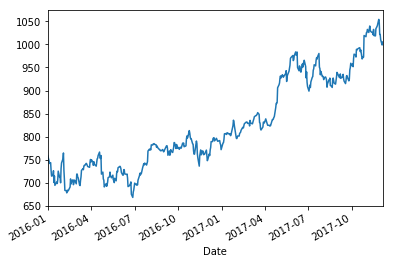

In [41]:
%matplotlib inline
stocks['GOOG']['Close'].plot()